# Motif LFC x State

Effect of each motif on adding to some specific background (random sequences for positive motifs, existing peaks for negative).

**Inputs**:
1. Outputs of Py_LFC_X_state notebook for positive and negative motifs.
2. Cluster configs

In [573]:
library(ggplot2)
library(scales)
library(reshape2)
library(patchwork)
library(dplyr)

## Load Inputs

### Configs

In [698]:
cluster_config = read.table("../configs/cluster.tsv", comment.char = '', header=T, sep='\t')
cluster_config$colour = as.character(cluster_config$colour)
cluster_config$description = as.character(cluster_config$description)

# adding for now, though it should be inside
cluster_config[16,] = c(cluster=16, color="#000000", description="iPSC", new_cluster=15)

cluster_config = cluster_config[!is.na(cluster_config$cluster), ]
rownames(cluster_config) = as.factor(cluster_config$cluster)
cluster_config$new_cluster = as.integer(cluster_config$new_cluster)
cluster_config$cluster = as.integer(cluster_config$cluster)
cluster_config

,cluster,colour,description,new_cluster
,<int>,<chr>,<chr>,<int>
1,1,#A6D854,Pre-iPSC,14
2,2,#F0A118,Intermediate,12
3,3,#E85F6D,Fibroblast-like,3
4,4,#006658,Neural-like,8
5,5,#B03743,Fibroblast,1
6,6,#CF175A,Fibroblast-like,4
7,7,#78A824,Pre-iPSC,13
8,8,#F4D5CD,Intermediate,11
9,9,#D4B81C,Intermediate,9


### Py_LFC_x_State outputs

In [703]:
pos_lfc_x_state = read.table("./LFC_x_state_intermediate/pos.random.bg.tsv", sep='\t', header=T)

# replace by new cell states
pos_lfc_x_state$cell_states = unlist(cluster_config[as.character(pos_lfc_x_state$cell_states), "new_cluster"])

pos_lfc_x_state

cell_states,AP2A_MOUSE..ATGGCCTGAGGC.,ATF1_MOUSE..CTGACGTCAC.,Ascl2..AGCAGCTGCT.,BATF.JUN_MA0462..GAAATGACTCA.,CEBPA_MA0102..ATTGCACAATA.,CEBPB_MOUSE..GGTTGTGCAAT.,CTCFL_HUMAN..GCCGCCAGGGGGCGCCG.,CTCF_MA0139..TGGCCACCAGGGGGCGCTA.,ELK4_MA0076..CCACTTCCGGC.,⋯,TWST1_MOUSE..ACATCTGGTTTTAATTA.,USF2_MOUSE..GGGTCACGTGGCCGCGGCG.,VEZF1_HUMAN..GGGGAGGGGGGAGGGGGAGGGG.,YY1_MA0095..CAAGATGGCGGC.,ZBTB33_MA0527..CTCTCGCGAGATCTG.,ZN143_HUMAN..GGCATTCTGGGAATTGTAGTTC.,ZN143_MOUSE..GGCATGCTGGGAATTGTAGTCC.,ZNF238_C2H2_1..AATCCAGATGTTG.,ZNF238_C2H2_2..CATCCAGATGTTC.,ZNF76_HUMAN..GGGGCATTCTGGGAATTGTAGT.
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.036370277,0.34141707,0.19568157,1.02592063,0.499277592,0.464616299,1.974730,2.071905,0.12834680,⋯,0.907472372,0.5302482,0.1211467,0.06295478,0.75989056,1.3463287,1.09665012,0.2961189747,0.257458806,1.05830908
6,0.030676186,0.22066921,0.11379421,0.67256463,0.136679471,0.120550454,1.576118,1.698063,0.31184399,⋯,0.470884860,0.4403087,0.1360121,0.06199929,0.06048012,1.4915609,1.56812119,0.0868374109,0.030190051,1.32407677
5,0.030664146,0.32567263,0.15418124,0.73002630,0.001942277,0.048674464,1.450519,1.674431,0.36305809,⋯,1.174015999,0.2573456,0.1226904,0.05788207,0.07203567,1.0717587,1.12539864,0.1486384869,0.144699395,0.81967247
10,0.024943352,0.18780637,0.06856652,0.46531636,0.011162162,0.009697407,1.603965,1.628974,0.35829598,⋯,0.881668687,0.3390667,0.2499511,0.05788243,0.07637149,1.1440284,1.12483025,0.1444220543,0.038534634,1.10394323
8,0.003824383,0.03660953,0.06713009,0.45018733,0.032889396,0.004272640,1.584149,1.628241,0.04242939,⋯,0.023597289,0.1765788,0.1119787,0.01296562,0.02494413,0.1199095,0.09816986,0.0058372654,0.008362412,0.03351498
11,0.024603605,0.17191827,0.09859586,0.45551872,0.020059824,0.002332687,1.624332,1.779115,0.25007415,⋯,0.037601829,0.3543879,0.1863554,0.04849672,0.08716440,0.6568680,0.73152375,0.0607014298,0.089923978,0.57282090
12,0.288419485,0.08262539,0.10106182,0.30617246,0.014429092,0.008249283,1.419636,1.661815,0.12771058,⋯,0.049878359,0.3158221,0.2296360,0.10543203,0.17745185,0.6644883,0.73876238,0.0593106747,0.064162970,0.61905742
13,0.580539346,0.07936227,0.07551897,0.18880320,0.008355856,0.013858199,1.556594,1.793942,0.21720040,⋯,0.008227587,0.2217628,0.3445730,0.06380406,0.05145621,0.8865888,0.78338504,-0.0008298159,-0.005275726,0.89105785
14,0.345325470,0.07772750,0.05991280,0.07551277,0.001721144,0.010477185,1.320829,1.488874,0.17534828,⋯,-0.006722450,0.2798333,0.2607962,0.05783260,0.05607259,0.8638772,0.81141949,0.0002033710,-0.008059263,0.73881793


In [700]:
neg_lfc_x_state = read.table("./LFC_x_state_intermediate/neg.random.bg.tsv", sep='\t', header=T)

# replace by new cell states
neg_lfc_x_state$cell_states = unlist(cluster_config[as.character(neg_lfc_x_state$cell_states), "new_cluster"])

neg_lfc_x_state

cell_states,ZBTB..GGGGTC.,ZEB..CAGGTG.
<int>,<dbl>,<dbl>
14,-0.06332922,-0.01111174
12,-0.13284278,-0.05767059
8,-0.37265193,-0.27875447
1,-0.20815349,-0.39925551
13,-0.09616208,-0.02456927
11,-0.18564296,-0.11157990
5,-0.12260056,-0.29265499
6,-0.15812886,-0.16674626
10,-0.08433461,-0.14612961


## Process

Format names of TFs and consensus seqs

In [704]:
colnames(pos_lfc_x_state)[grep("pou", colnames(pos_lfc_x_state), ignore.case = T)]

[1] "Pou5f1.Sox2_MA0142..CTTTGTTATGCAAAT."

In [706]:
pos_tf_names = unlist(lapply(strsplit(colnames(pos_lfc_x_state)[2:ncol(pos_lfc_x_state)], "\\.\\."), "[[", 1))
pos_tf_seq = unlist(lapply(strsplit(colnames(pos_lfc_x_state)[2:ncol(pos_lfc_x_state)], "\\.\\."), "[[", 2))

pos_tf_names
pos_tf_seq

[1] "AP2A_MOUSE"         "ATF1_MOUSE"         "Ascl2"             
 [4] "BATF.JUN_MA0462"    "CEBPA_MA0102"       "CEBPB_MOUSE"       
 [7] "CTCFL_HUMAN"        "CTCF_MA0139"        "ELK4_MA0076"       
[10] "ETS1_HUMAN"         "ETV1_HUMAN"         "FOSL2.JUNB_MA1138" 
[13] "FOXC2_MA0846"       "FOXL2_MOUSE"        "Gabpa_MA0062"      
[16] "IRF1_MA0050"        "IRF1_MOUSE"         "JDP2_MA0656"       
[19] "JUN_MOUSE"          "KAISO_MOUSE"        "KLF3_HUMAN"        
[22] "KLF4_HUMAN"         "KLF5_MA0599"        "MAZ_HUMAN"         
[25] "MSC_MA0665"         "NFIA_HUMAN"         "NFIC_HUMAN"        
[28] "NFYB_MOUSE"         "NRF1_MA0506"        "NRF1_MOUSE"        
[31] "Pou5f1.Sox2_MA0142" "REST_MA0138"        "RFX1_MOUSE"        
[34] "RFX2_HUMAN"         "RFX2_MOUSE"         "RUNX1_HUMAN"       
[37] "RUNX3_HUMAN"        "Rfx1_MA0509"        "SIX2_HUMAN"        
[40] "SOX2_MOUSE"         "SP1_HUMAN"          "SP1_MOUSE"         
[43] "SP2_MA0516"         "SP5_MOUSE"          "TAF1_HUMAN"        
[46] "TEAD1_HUMAN"        "TEAD3_TEA_1"        "TEAD3_TEA_2"       
[49] "TEAD4_HUMAN"        "THA11_MOUSE"        "TWIST1_MA1123"     
[52] "TWST1_MOUSE"        "USF2_MOUSE"         "VEZF1_HUMAN"       
[55] "YY1_MA0095"         "ZBTB33_MA0527"      "ZN143_HUMAN"       
[58] "ZN143_MOUSE"        "ZNF238_C2H2_1"      "ZNF238_C2H2_2"     
[61] "ZNF76_HUMAN"

[1] "ATGGCCTGAGGC."             "CTGACGTCAC."              
 [3] "AGCAGCTGCT."               "GAAATGACTCA."             
 [5] "ATTGCACAATA."              "GGTTGTGCAAT."             
 [7] "GCCGCCAGGGGGCGCCG."        "TGGCCACCAGGGGGCGCTA."     
 [9] "CCACTTCCGGC."              "AGACAGGAAGTGG."           
[11] "GGCCGGAAGTG."              "GATGACTCAT."              
[13] "TAAGTAAACAAA."             "TGTTTACATTT."             
[15] "CCGGAAGTGGC."              "TTTTACTTTCACTTTCACTTT."   
[17] "GAAAGTGAAAGTGAAAGTAA."     "GATGACGTCATC."            
[19] "GGTGAGTCAC."               "CAAATCTCGCGAGAA."         
[21] "GGGGAGGGGCGGGGCCGGG."      "AGGGTGTGGC."              
[23] "GCCCCGCCCC."               "GGGGGAGGGGGGGGGGGGGGGG."  
[25] "AACAGCTGTT."               "TTGGCACGGTGCCAA."         
[27] "CTTGGCTCCCTGCCAAG."        "CAGCCAATCAGAG."           
[29] "GCGCCTGCGCA."              "CACTGCGCATGCGCAGG."       
[31] "CTTTGTTATGCAAAT."          "TTCAGCACCATGGACAGCGCC."   
[33] "GCCCCGGTTGCCATGGCGACGG."   "CGGTTGCCATGGCAACGG."      
[35] "GGCGGTTGCCATGGCAACGGGA."   "TCTGTGGTTTC."             
[37] "TTTGTGGTTT."               "GTTGCCATGGCAAC."          
[39] "TGAAACCTGAGAC."            "TCCTTTGTTATGCAAA."        
[41] "GGGGGGCGGGGCCGGGGGGGGG."   "GGGGGGGGAGGGGGCGGGGCCGGG."
[43] "GCCCCGCCCCCTCCC."          "GGGGGGGAGGGGGAGGGGGAGGAG."
[45] "AAGATGGCGGCGGCGG."         "ACATTCCAGCCA."            
[47] "ACATTCCTCGCATTCCA."        "ACATTCCA."                
[49] "ACATTCCTGGCAT."            "GGCATGCTGGGAGTTGTAGTTC."  
[51] "ATTCCAGATGTTT."            "ACATCTGGTTTTAATTA."       
[53] "GGGTCACGTGGCCGCGGCG."      "GGGGAGGGGGGAGGGGGAGGGG."  
[55] "CAAGATGGCGGC."             "CTCTCGCGAGATCTG."         
[57] "GGCATTCTGGGAATTGTAGTTC."   "GGCATGCTGGGAATTGTAGTCC."  
[59] "AATCCAGATGTTG."            "CATCCAGATGTTC."           
[61] "GGGGCATTCTGGGAATTGTAGT."

In [708]:
neg_tf_names = unlist(lapply(strsplit(colnames(neg_lfc_x_state)[2:ncol(neg_lfc_x_state)], "\\.\\."), "[[", 1))
neg_tf_seq = unlist(lapply(strsplit(colnames(neg_lfc_x_state)[2:ncol(neg_lfc_x_state)], "\\.\\."), "[[", 2))

neg_tf_names
neg_tf_seq

[1] "ZBTB" "ZEB"

[1] "GGGGTC." "CAGGTG."

In [707]:
# based on https://stackoverflow.com/questions/54715296/paste-italics-with-two-vectors
# bold TF name, add sequence
get_bold_tf_with_seq <- function(tfn, tfs) {
    gsub(" ", "~", tfn) %>% 
    paste('bold(',.,')', '*" (',tfs, ')"', sep = "") -> to_parse

    to_parse 

    to_parse %>% parse(text = .) -> parsed
    parsed
}


In [712]:
# bolded_pos = get_bold_tf_with_seq(pos_tf_names, pos_tf_seq) # NEED TO RECOMPUTE AFTER ORDERING
bolded_neg = get_bold_tf_with_seq(neg_tf_names, neg_tf_seq)

## Plot

**TODO: Set Cluster Order Manually** 

In [714]:
options(repr.plot.width = 2, repr.plot.height = 10)

cluster_config_selected = cluster_config[cluster_config$new_cluster %in% pos_lfc_x_state$cell_states,]

cluster_colourbar <- ggplot(cluster_config_selected, 
                            aes(y=factor(new_cluster, 
                                            levels=rev(levels(factor(new_cluster)))), 
                            x=1, 
                            fill = as.factor(new_cluster), 
                            label=as.factor(new_cluster))) +
  geom_bar(stat="identity") +
  ylab("Cell State") +
  theme_void() +
  scale_fill_manual(values = as.character(cluster_config_selected$colour[order(cluster_config_selected$new_cluster)])) +
  theme(legend.position = 'none',
#         axis.text.y = element_text(size=16, margin=margin(r=-20)),
        axis.text.y = element_blank(),
        axis.title.y = element_text(size=20, angle=90, margin=margin(r=10)))

In [715]:
to_plot_pos = melt(pos_lfc_x_state, id="cell_states")
to_plot_neg = melt(neg_lfc_x_state, id="cell_states")

# base 2
to_plot_pos$value = to_plot_pos$value/log(2)
to_plot_neg$value = to_plot_neg$value/log(2)

In [716]:
scale = scale_fill_gradientn(colors=c("tomato", 'white','steelblue','seagreen3'),                      
                      limits=c(min(to_plot_neg$value), 
                              max(to_plot_pos$value)),
                     values = rescale(c(min(to_plot_neg$value), 
                                    0,
#                               quantile(to_plot_pos$value, 0.9),      
                                        1,
                              max(to_plot_pos$value))),
                     name="Log2 Insertion\nFold Change")

In [720]:
quantile(to_plot_pos$value, 0.995)

99.5% 
2.839927

In [721]:
# weighted sum of row number by lfc
tf_weights = colSums(pos_lfc_x_state[,2:ncol(pos_lfc_x_state)] * seq(nrow(pos_lfc_x_state)))/colSums(pos_lfc_x_state[,2:ncol(pos_lfc_x_state)])

In [728]:
# tf_hclust = hclust(dist(t(pos_lfc_x_state[,2:ncol(pos_lfc_x_state)])))

# 1 - correlation as distance
tf_hclust = hclust(as.dist(1-cor(pos_lfc_x_state[,2:ncol(pos_lfc_x_state)], method='spearman')))

tf_hclust_reordered = as.hclust(reorder(as.dendrogram(tf_hclust), tf_weights, agglo.FUN = "mean"))

# tf_order = colnames(pos_lfc_x_state)[2:ncol(pos_lfc_x_state)][tf_hclust$order]
pos_ordering = tf_hclust_reordered$order
tf_order = colnames(pos_lfc_x_state)[2:ncol(pos_lfc_x_state)][tf_hclust_reordered$order]

### Option 1

In [823]:
options(repr.plot.width = 18, repr.plot.height = 10)


pos_plot = ggplot(to_plot_pos) +
geom_tile(aes(x=factor(variable, levels=tf_order), 
              y=factor(cell_states, 
                       levels=rev(levels(factor(cell_states)))), 
              fill=value)) + 
scale +

ylab("Cell State") +
theme_bw(base_size=20) +
scale_x_discrete(labels= get_bold_tf_with_seq(pos_tf_names[pos_ordering],
                                             pos_tf_seq[pos_ordering])) +
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, size=16),
      axis.title.y = element_blank(),
     axis.title.x = element_blank(),
     legend.position="none") 

In [826]:
options(repr.plot.width = 4, repr.plot.height = 10)

neg_plot = ggplot(to_plot_neg) +
geom_tile(aes(x=variable, 
              y=factor(cell_states, 
                       levels=rev(levels(factor(cell_states)))), 
              fill=value)) + 
scale + 
ylab("Cell State") +
theme_bw(base_size=20) +
theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, size=16),
     axis.title.x = element_blank(),
     axis.title.y = element_blank(),
     axis.text.y = element_blank(),
     axis.ticks.y = element_blank()) +
scale_x_discrete(labels=bolded_neg) +
guides(fill = guide_colourbar(#barheight = unit( 3 , "in" ),
                                ticks.colour = "black",
                                ticks.linewidth = 2)) 

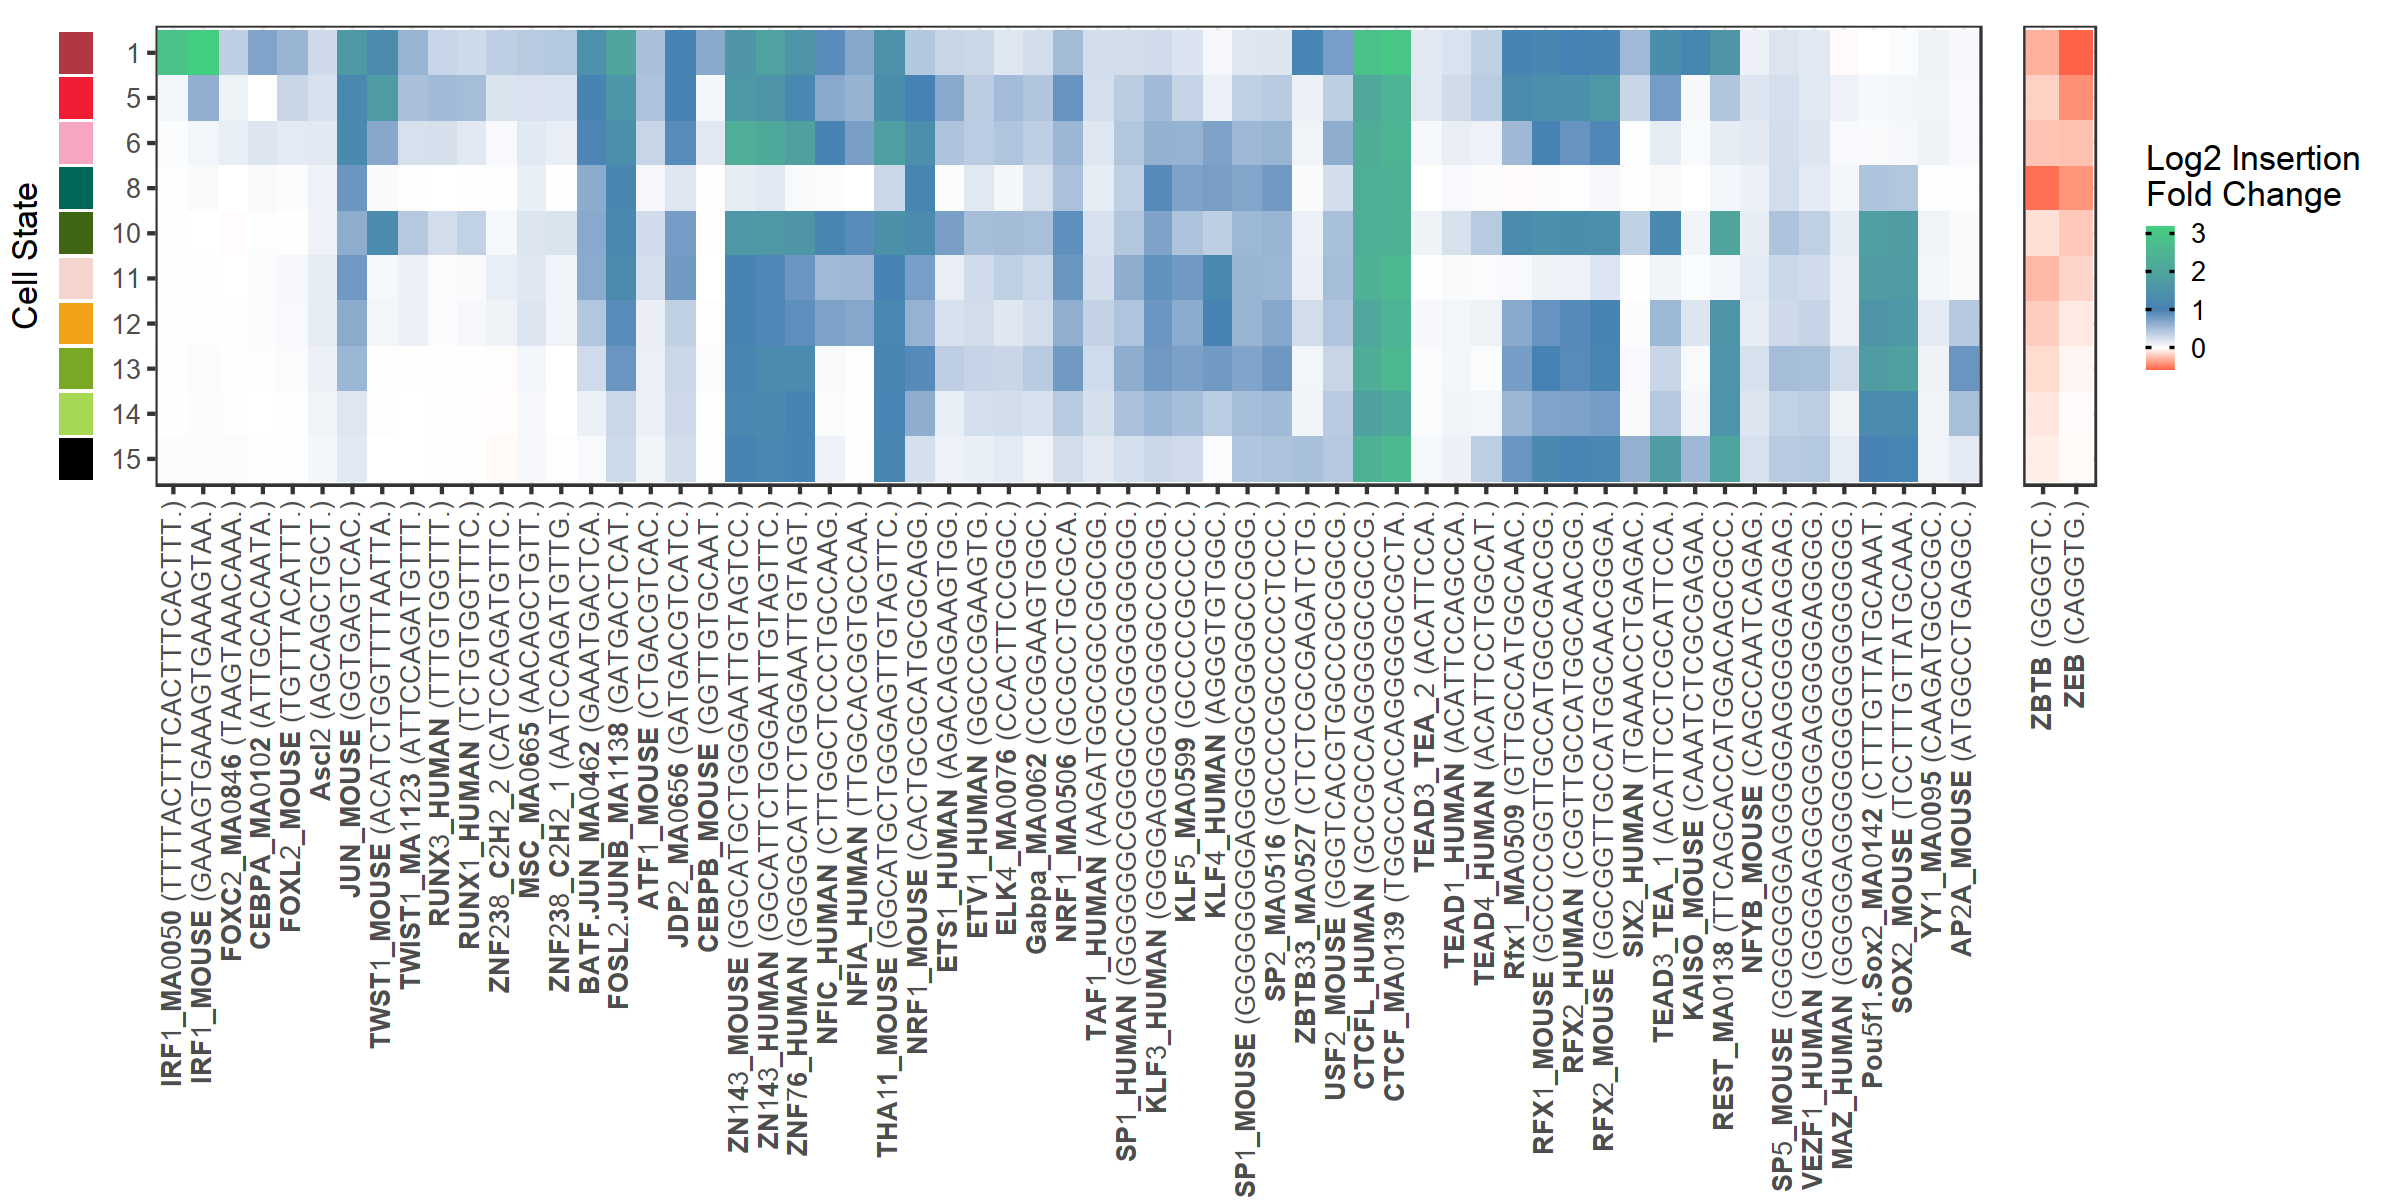

In [827]:
options(repr.plot.width = 20, repr.plot.height = 10)

wrap_plots(cluster_colourbar,
           pos_plot,
           neg_plot,
           widths=c(1,50,2))

### Option 2

In [838]:
# for secondary axis with discrete x
# https://stackoverflow.com/questions/45361904/duplicating-and-modifying-discrete-axis-in-ggplot2

In [861]:
pos_plot = ggplot(to_plot_pos) +
geom_tile(aes(x=as.numeric(factor(variable, levels=tf_order)), 
              y=factor(cell_states, 
                       levels=rev(levels(factor(cell_states)))), 
              fill=value)) + 
scale +

ylab("Cell State") +
theme_bw(base_size=20) +
scale_x_continuous(breaks = 1:length(pos_tf_names),
                   labels = pos_tf_names[pos_ordering] %>% paste('bold(',.,')') %>% parse(text = .),
                   sec.axis = sec_axis(~.,
                                       breaks = 1:length(pos_tf_names),
                                       labels = pos_tf_seq[pos_ordering],
                                      name="Consensus Sequence"),                
                   expand = c(0, 0),
                  name="Motif") +

theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, size=16),
            axis.title.x.top = element_text(size=20),
      axis.text.x.top = element_text(angle = 90, hjust = 0, vjust=0.5),
      axis.title.y = element_blank(),
     axis.title.x = element_text(size=20),
     legend.position="none") 

In [862]:
neg_plot = ggplot(to_plot_neg) +
geom_tile(aes(x=as.numeric(variable), 
              y=factor(cell_states, 
                       levels=rev(levels(factor(cell_states)))), 
              fill=value)) + 
scale +

ylab("Cell State") +
theme_bw(base_size=20) +
scale_x_continuous(breaks = 1:length(neg_tf_names),
                   labels = neg_tf_names %>% paste('bold(',.,')') %>% parse(text = .),
                   sec.axis = sec_axis(~.,
                                       breaks = 1:length(neg_tf_names),
                                       labels = neg_tf_seq),
                   expand = c(0, 0)) +

theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, size=16),
      axis.text.x.top = element_text(angle = 90, hjust = 0, vjust=0.5),
     axis.title.x = element_blank(),
     axis.title.y = element_blank(),
     axis.text.y = element_blank(),
     axis.ticks.y = element_blank()) +
guides(fill = guide_colourbar(#barheight = unit( 3 , "in" ),
                                ticks.colour = "black",
                                ticks.linewidth = 2))

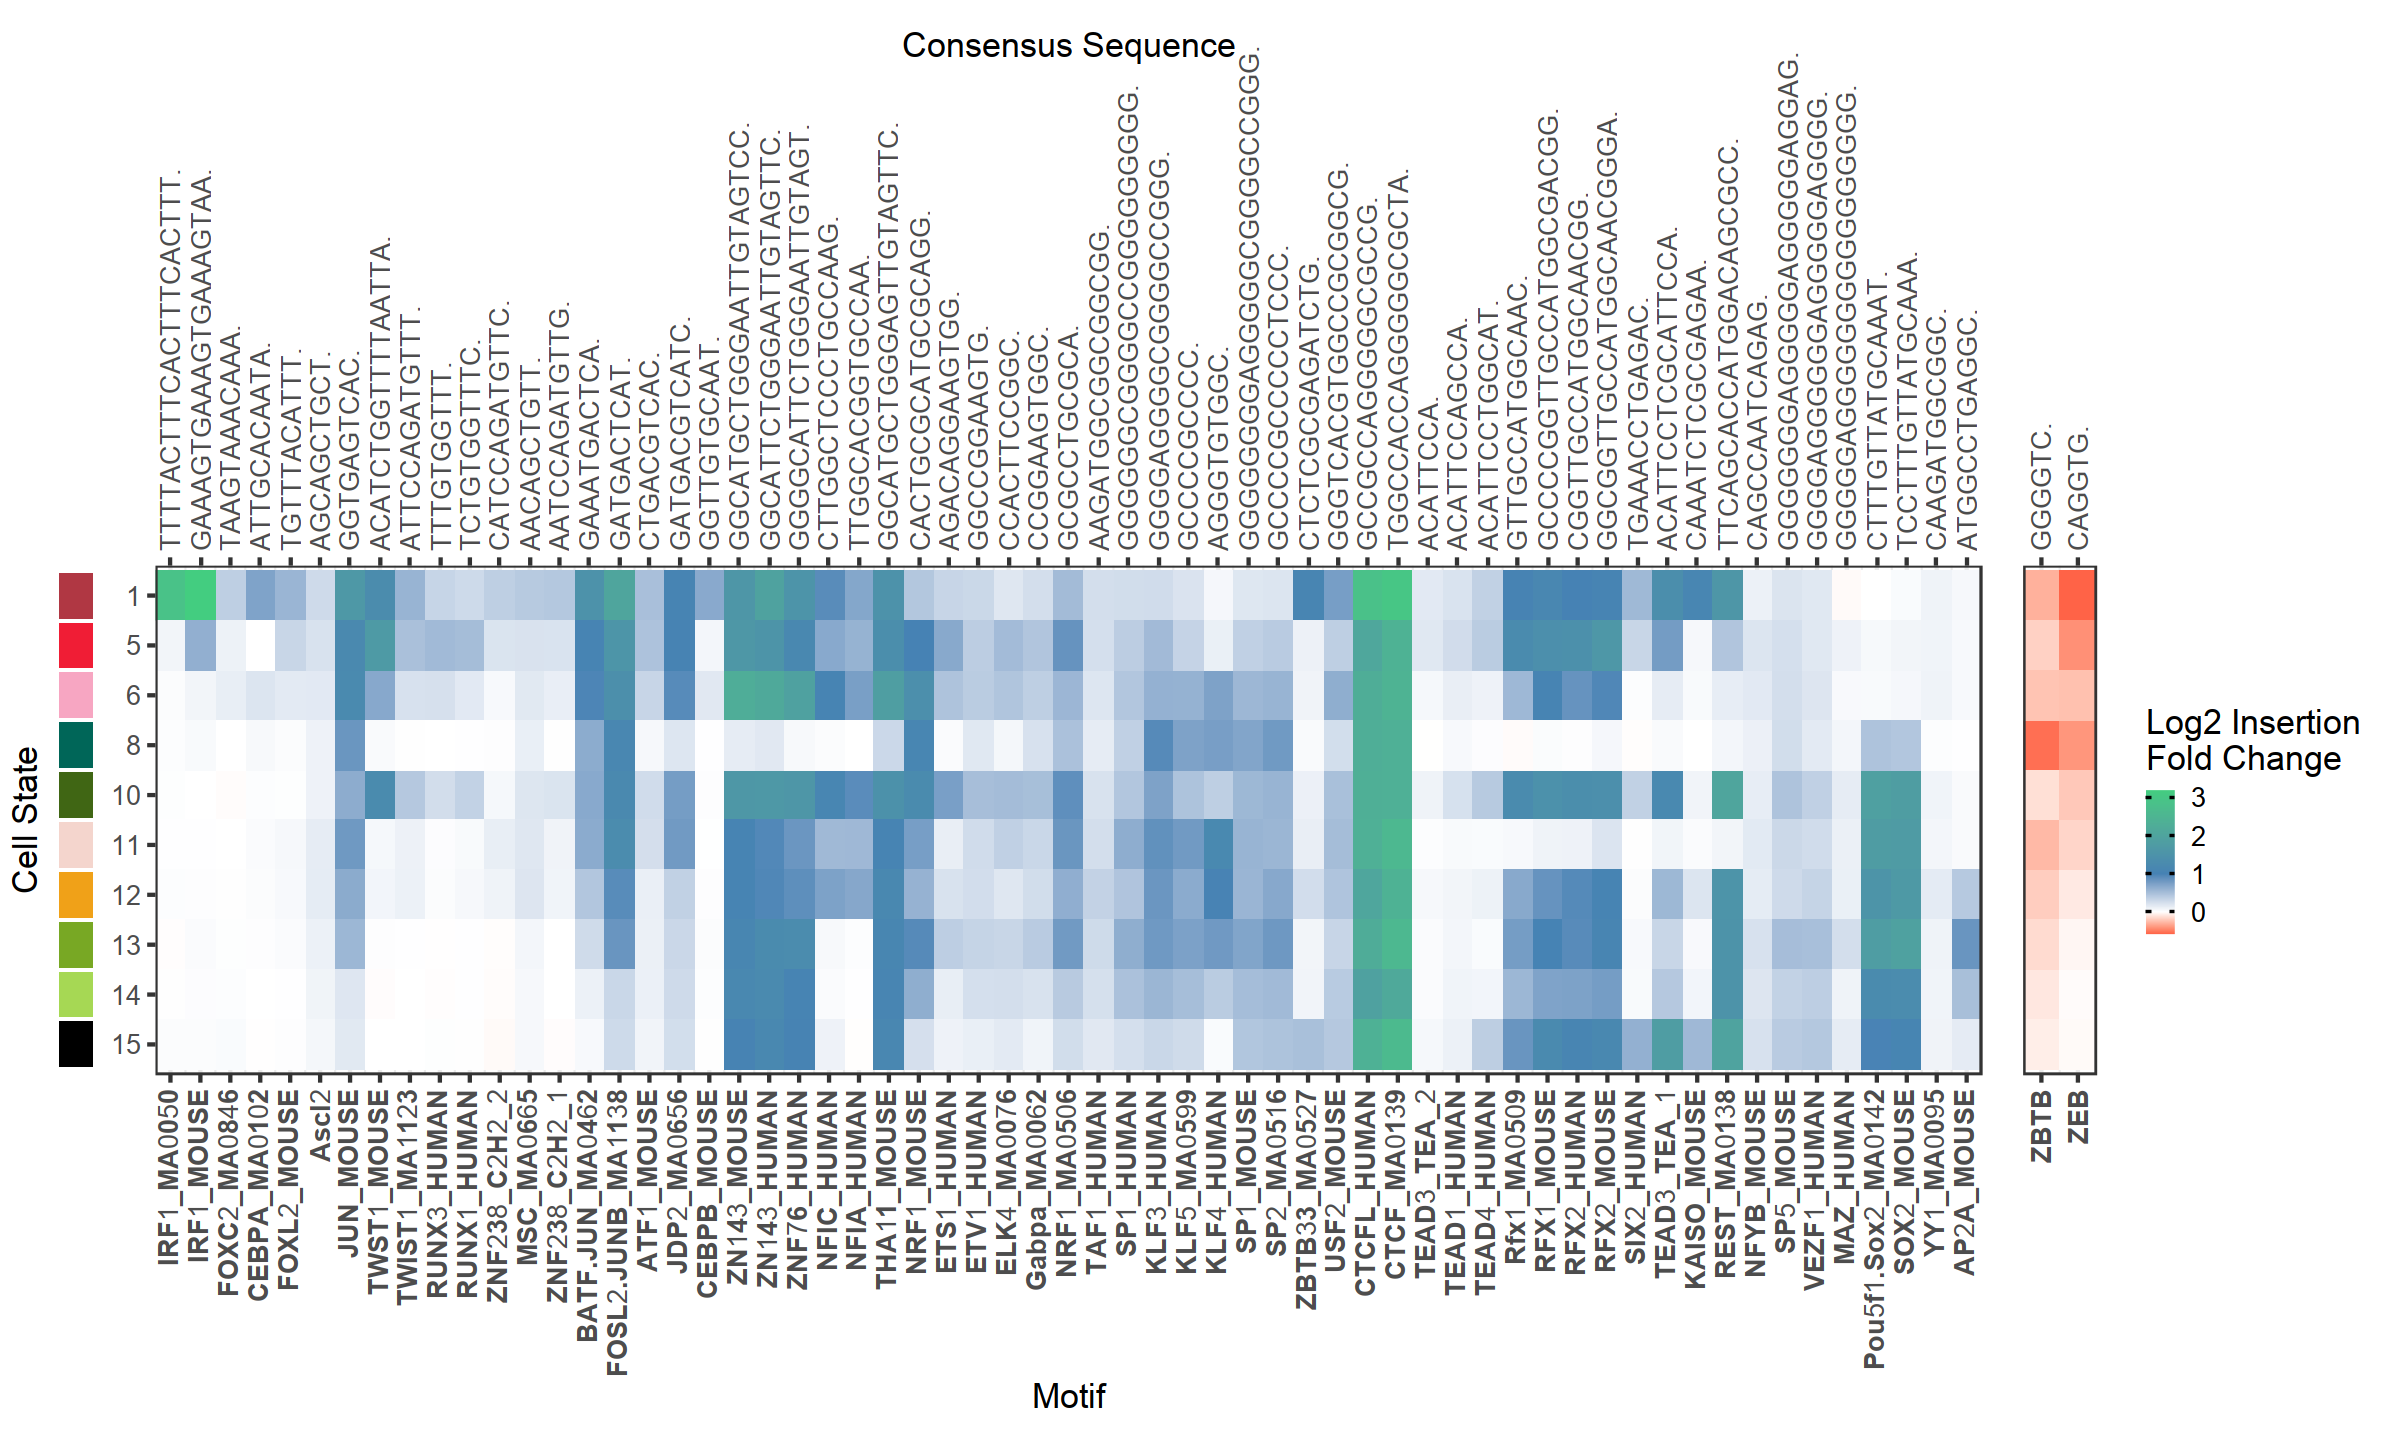

In [865]:
options(repr.plot.width = 20, repr.plot.height = 12)

p <- wrap_plots(cluster_colourbar,
           pos_plot,
           neg_plot,
           widths=c(1,50,2))
p

In [867]:
ggsave("tmp.pdf", p, width=20, height=12)

---

In [839]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dplyr_1.0.2     patchwork_1.0.0 reshape2_1.4.4  scales_1.1.0   
[5] ggplot2_3.3.3  

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.5       pillar_1.4.6     compiler_3.6.3   plyr_1.8.6      
 [5] base64enc_0.1-3  tools_3.6.3      digest_0.6.25    uuid_0.1-4      
 [9] jsonlite_1.6.1  